# MODEL 1: LOGISTIC REGRESSION
Omar Ebrahim & Kareem Eltouny

STEP 1: Importing the libraries.

In [1]:
import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

STEP 2: Importing the dataset & splitting them to training and testing.

In [2]:
fashionTrain = pd.read_csv("fashion-mnist_train.csv")
fashionTest = pd.read_csv("fashion-mnist_test.csv")

# The splitting was done without a library instead of using the train test split function.
# This is due to us reading from 2 separate CSV files.
X_train = fashionTrain.iloc[:, 1:]
y_train = fashionTrain.iloc[:, 0]
X_test = fashionTest.iloc[:, 1:]
y_test = fashionTest.iloc[:, 0]

STEP 3: Pre-Processing Part 1: Normalization 

In [3]:
norm = Normalizer(norm='max')
# We used max scaling such that the minimum value of the features gets transformed into a 0, the maximum value gets transformed into a 1.
norm.fit(X_train)
X_train_scaled = norm.transform(X_train)

norm = Normalizer(norm='max') 
norm.fit(X_test)
X_test_scaled = norm.transform(X_test)
# Note that when trying l1 and l2 normalization instead, we got a faster run-time, but significantly lower accuracies and F1 scores.

STEP 4: Pre-Processing Part 2: PCA

In [4]:
# The second pre-processing step of PCA (Principal Component Analysis) was used to reduce the dimensions of the features.
# 0.99 was decided as the % of number of components over the total features because it produced the best training time and accuracy scores.
pca = PCA(n_components=0.99) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

STEP 5: Training the Logistic Regression Model.

In [5]:
start = time.time()
# C = 1/30 and l2 regularization were decided based on the accuracy scores reached. 
# We set a high iteration score to avoid convergence.
clf = LogisticRegression(C=1/30, max_iter=10000, penalty='l2')                                      
clf.fit(X_train_pca, y_train)
y_predict = clf.predict(X_test_pca)
end = time.time()

STEP 6: Get the accuracies and F1 score.

In [6]:
# Used a data frame to neatly show the results.
TestingAccuracy = accuracy_score(y_test, y_predict)
TrainingAccuracy = accuracy_score(y_train, clf.predict(X_train_pca))
f1Test = f1_score(y_test, y_predict, average='weighted')
timeScore = (start - end)*(-1)
Classfication = classification_report(y_test, y_predict)

Scores = pd.DataFrame({
    'Accuracy_Test': [TestingAccuracy],
    'Accuracy_Train': [TrainingAccuracy],
    'F1_Score_Test': [f1Test],
    'Time_Score': [timeScore]
})
Scores

,Accuracy_Test,Accuracy_Train,F1_Score_Test,Time_Score
0,0.8558,0.864333,0.85483,30.219985


In [7]:
print(Classfication)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.76      0.77      1000
           3       0.86      0.89      0.88      1000
           4       0.78      0.81      0.79      1000
           5       0.92      0.91      0.92      1000
           6       0.66      0.60      0.63      1000
           7       0.90      0.91      0.91      1000
           8       0.94      0.94      0.94      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000



STEP 7: Visualizing using the Confusion Matrix.

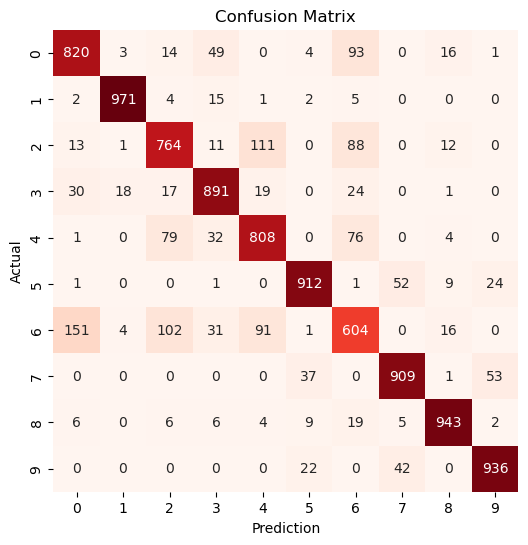

In [8]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()